<a href="https://colab.research.google.com/github/jptable/Iirs_Classification/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

## Load File

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import io 

In [ ]:
# read file
upload = files.upload()
df = pd.read_csv('IRIS.csv')

Saving IRIS.csv to IRIS.csv


## Preprocessing

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(df['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
print(df.describe(include='all'))

        sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN


In [ ]:
x = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values
label = LabelEncoder()
y_label = label.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_label, train_size=0.8, random_state=20)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## K-Means

In [ ]:
# Kmeans
classifier = KMeans(init='k-means++', n_init=10, n_clusters=3, random_state=0)
ykmeans = classifier.fit_predict(x)

### 用 petal 呈現

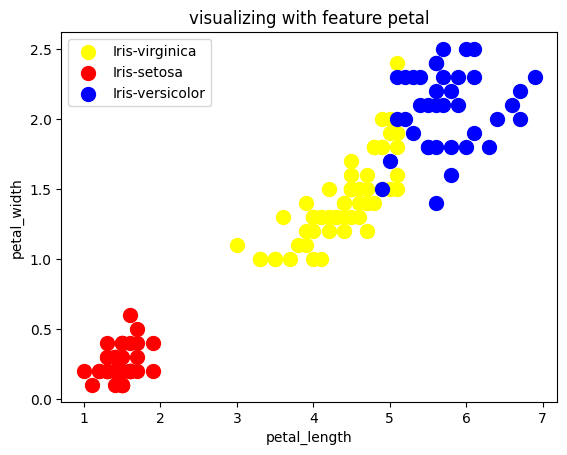

In [ ]:
# plot
plt.scatter(x[ykmeans == 0, 2], x[ykmeans == 0, 3], color='yellow', s=100, label='Iris-virginica')
plt.scatter(x[ykmeans == 1, 2], x[ykmeans == 1, 3], color='red', s=100, label='Iris-setosa')
plt.scatter(x[ykmeans == 2, 2], x[ykmeans == 2, 3], color='blue', s=100, label='Iris-versicolor')
plt.title('visualizing with feature petal')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()



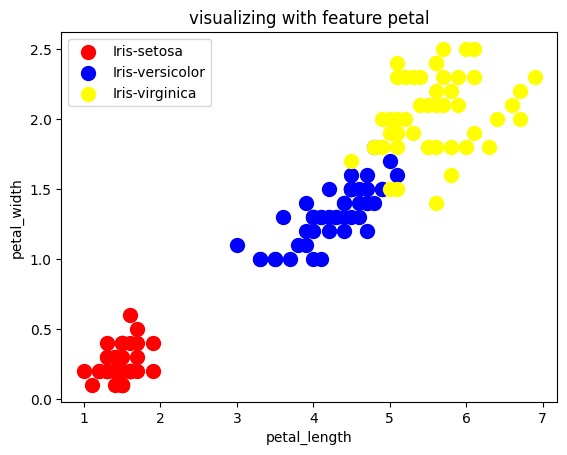

In [ ]:
# 對照真實y值
plt.scatter(x[y_label==0, 2], x[y_label==0, 3], color='red', s=100, label='Iris-setosa')
plt.scatter(x[y_label==1, 2], x[y_label==1, 3], color='blue', s=100, label='Iris-versicolor')
plt.scatter(x[y_label==2, 2], x[y_label==2, 3], color='yellow', s=100, label='Iris-virginica')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('visualizing with feature petal')
plt.legend()
plt.show()

### 用 sepal 呈現

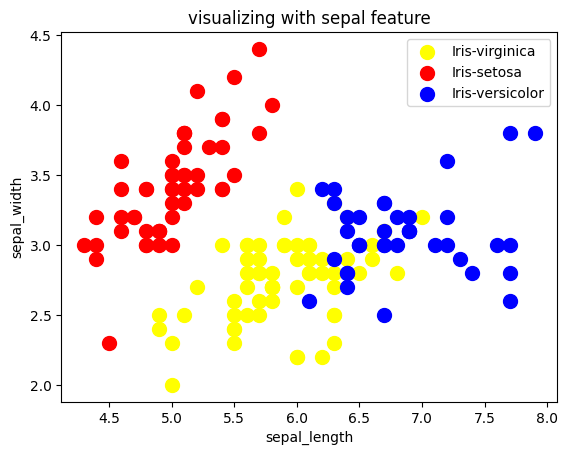

In [ ]:
# K-Means
# plot
plt.scatter(x[ykmeans == 0, 0], x[ykmeans == 0, 1], color='yellow', s=100, label='Iris-virginica')
plt.scatter(x[ykmeans == 1, 0], x[ykmeans == 1, 1], color='red', s=100, label='Iris-setosa')
plt.scatter(x[ykmeans == 2, 0], x[ykmeans == 2, 1], color='blue', s=100, label='Iris-versicolor')
plt.title('visualizing with sepal feature')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

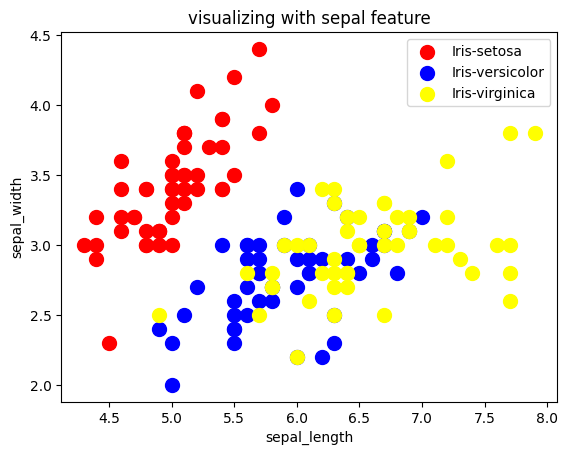

In [ ]:
# 對照真實y值
plt.scatter(x[y_label==0, 0], x[y_label==0, 1], color='red', s=100, label='Iris-setosa')
plt.scatter(x[y_label==1, 0], x[y_label==1, 1], color='blue', s=100, label='Iris-versicolor')
plt.scatter(x[y_label==2, 0], x[y_label==2, 1], color='yellow', s=100, label='Iris-virginica')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('visualizing with sepal feature')
plt.legend()
plt.show()

## Kernal SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(y_pred)

[0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  9]])

## Naive Bayes

In [ ]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print(y_pred)

[1 2 2 0 2 2 0 1 0 1 0 2 2 1 1 0 1 2 0 2 2 2 0 1 2 2 2 1 0 2]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 7  0  0]
 [ 0  8  0]
 [ 1  0 14]]
0.9666666666666667


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LoR = LogisticRegression()
LoR.fit(x_train, y_train)
y_pred = LoR.predict(x_test)
print(y_pred)

[1 2 2 0 2 2 0 1 0 1 0 2 2 1 1 0 1 2 2 2 0 2 2 1 2 2 2 1 0 2]


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 6  0  1]
 [ 0  8  0]
 [ 1  0 14]]
0.9333333333333333


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dis = DecisionTreeClassifier(criterion='entropy', random_state=100)
dis.fit(x_train, y_train)
y_pred = dis.predict(x_test)
print(y_pred)

[0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1]


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]
0.9333333333333333


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomForest.fit(x_train, y_train)
y_pred = randomForest.predict(x_test)
print(y_pred)

[0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]
0.9333333333333333
